<a href="https://colab.research.google.com/github/Patarakorn/Measure-Mather/blob/main/Greens_Detection_Train_YOLO_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Apr 19 16:58:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/path/to/data.zip /content

In [ ]:
# Unzip images to a custom data folder
!unzip -q /content/data3.zip -d /content/custom_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-04-19 16:59:26--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-04-19 16:59:26 (52.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 15
Number of annotation files: 15
Images moving to train: 13
Images moving to validation: 2


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 1
names:
- Greens


In [ ]:
!yolo segment train data=/content/data.yaml model=yolov8s-seg.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 22.8M/22.8M [00:00<00:00, 63.0MB/s]
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=Non

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/3 /content/data/validation/images/c38c6faa-IMG20250409132028_-_Mauro_Morabito.jpg: 480x640 1 Plate, 60.0ms
image 2/3 /content/data/validation/images/c98062f7-IMG_8726_1.jpg: 480x640 1 Plate, 13.2ms
image 3/3 /content/data/validation/images/f7caf2fa-IMG_0672_-_Sophie-An_Kingsbury_Lee.jpg: 480x640 1 Plate, 16.1ms
Speed: 4.6ms preprocess, 29.8ms inference, 73.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo segment predict model=runs/segment/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /content/data/validation/images/13387b54-IMG_0396_2_1.jpg: 480x640 1 Greens, 77.3ms
image 2/2 /content/data/validation/images/314461dc-IMG_0760.jpg: 480x640 (no detections), 17.0ms
Speed: 4.6ms preprocess, 47.1ms inference, 104.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


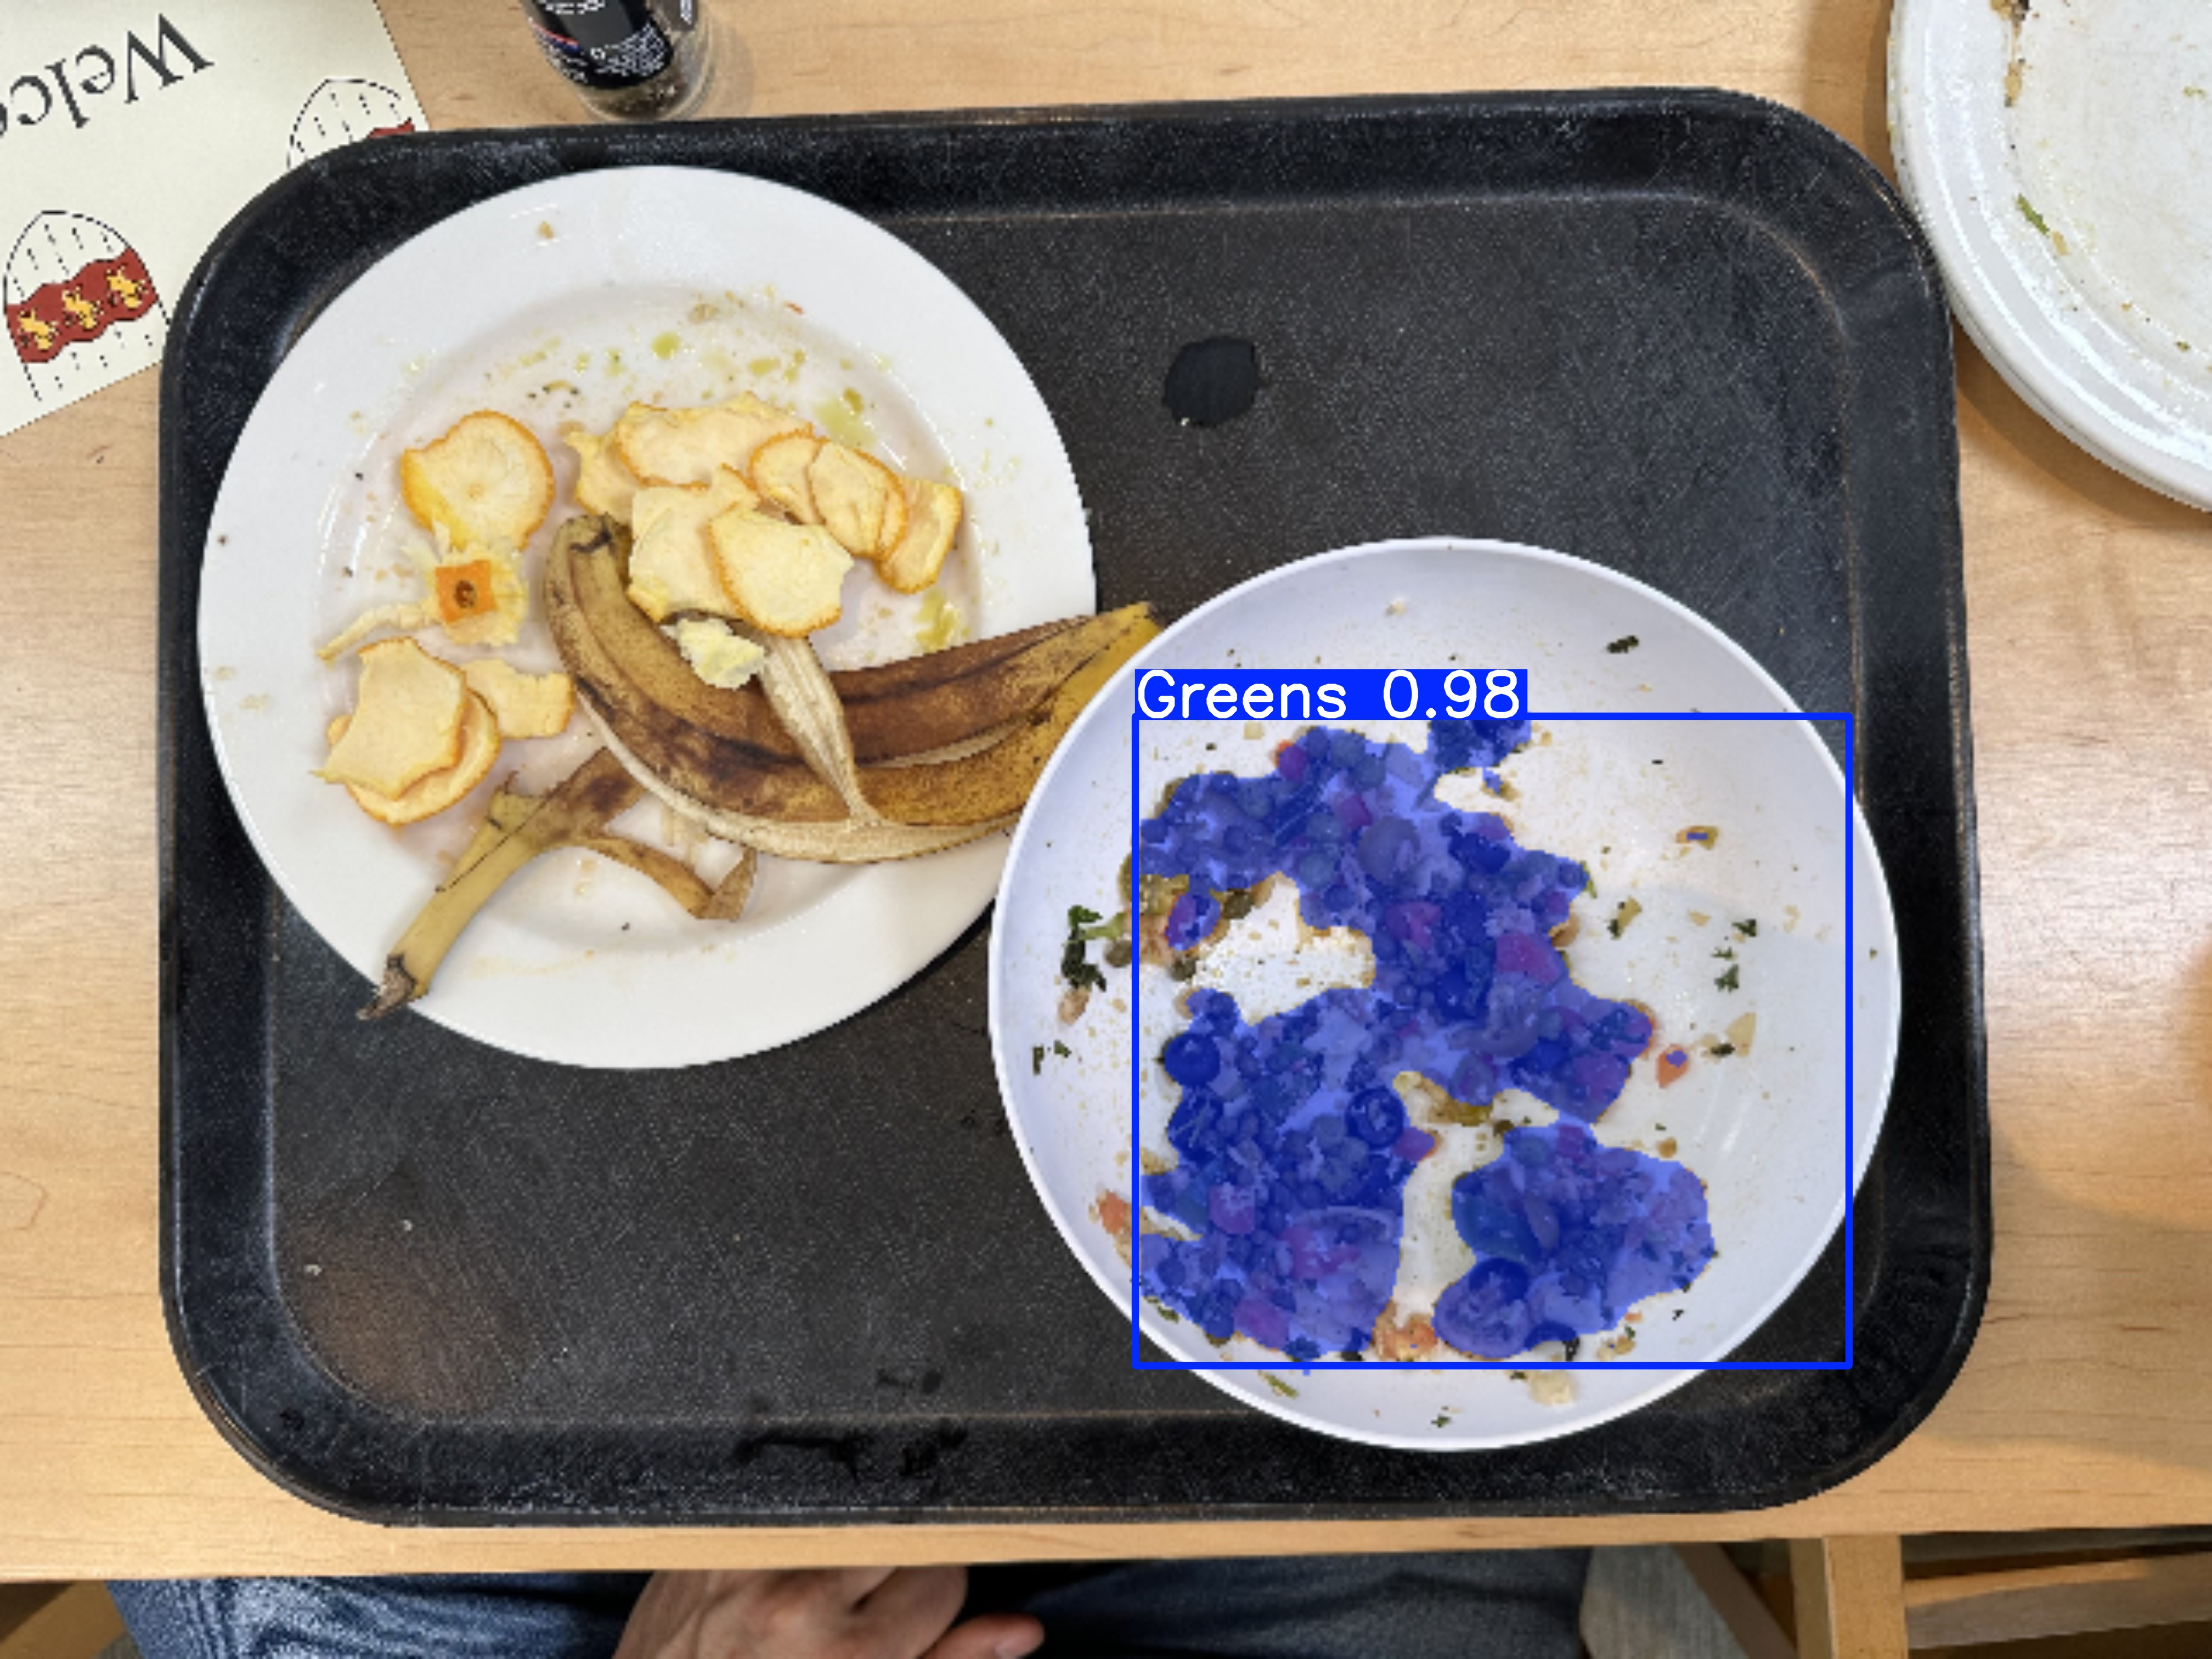

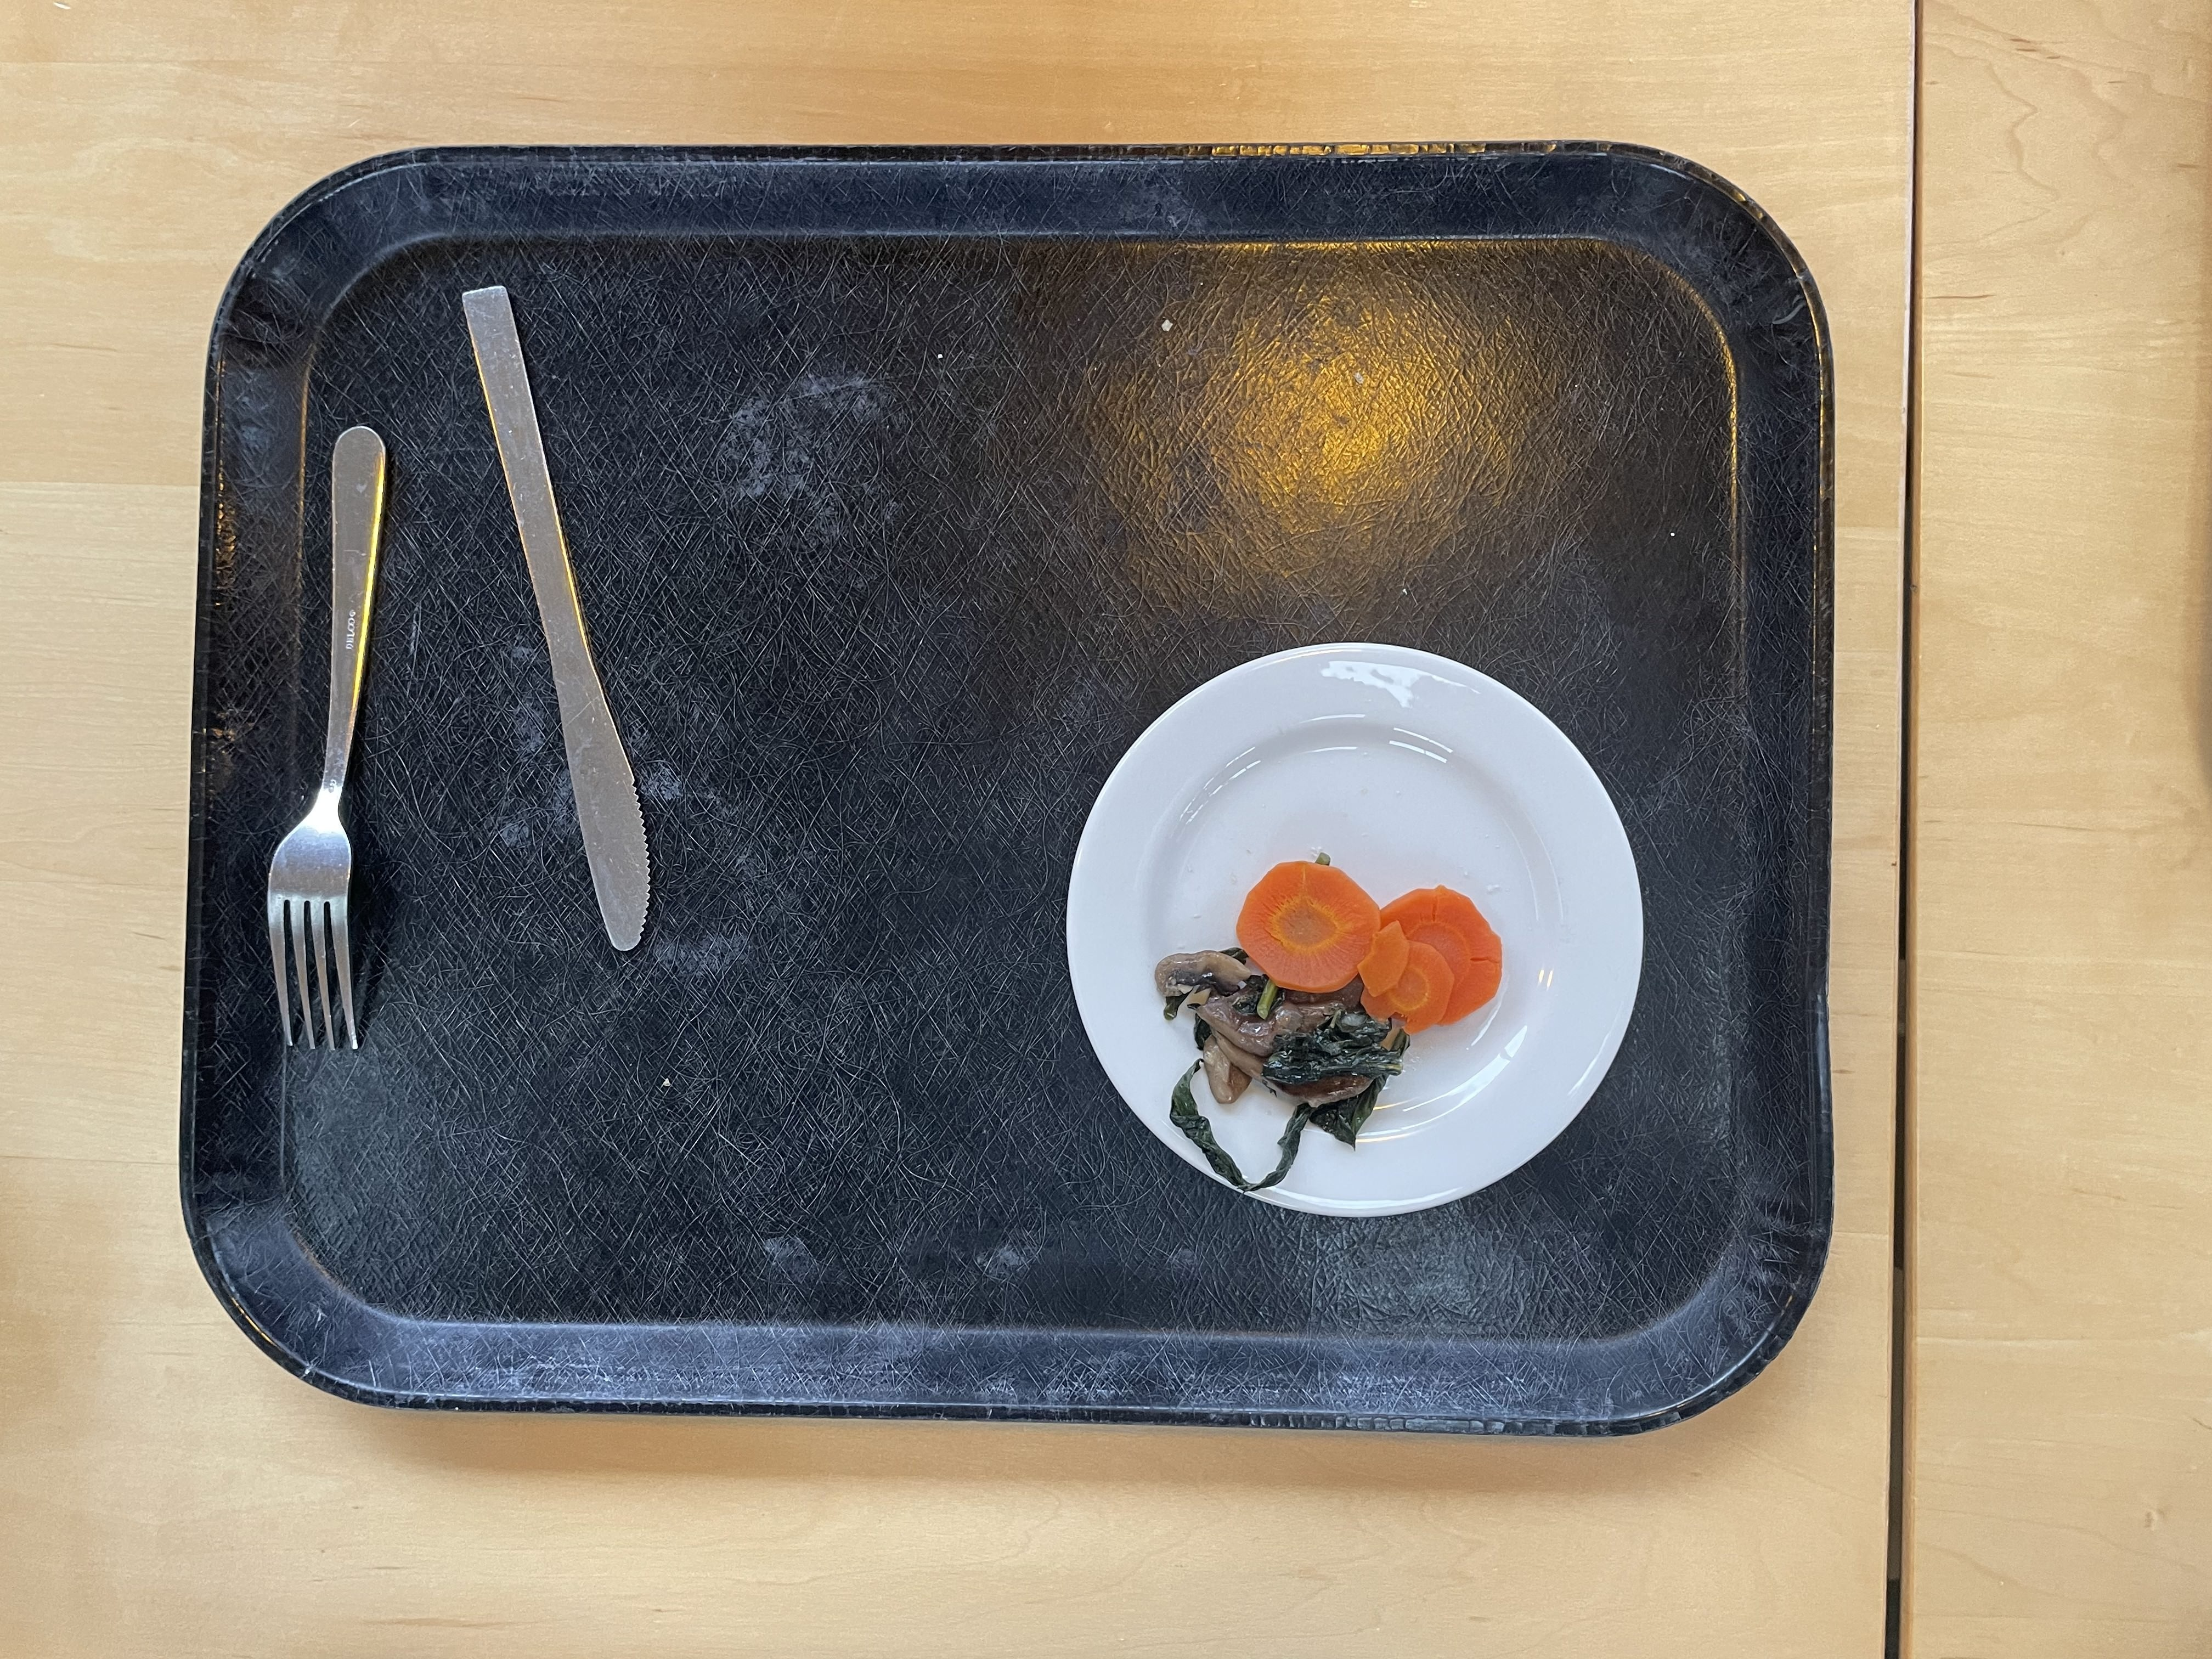

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


image 1/1 /content/data/validation/images/13387b54-IMG_0396_2_1.jpg: 480x640 1 Greens, 56.5ms
Speed: 3.6ms preprocess, 56.5ms inference, 154.9ms postprocess per image at shape (1, 3, 480, 640)


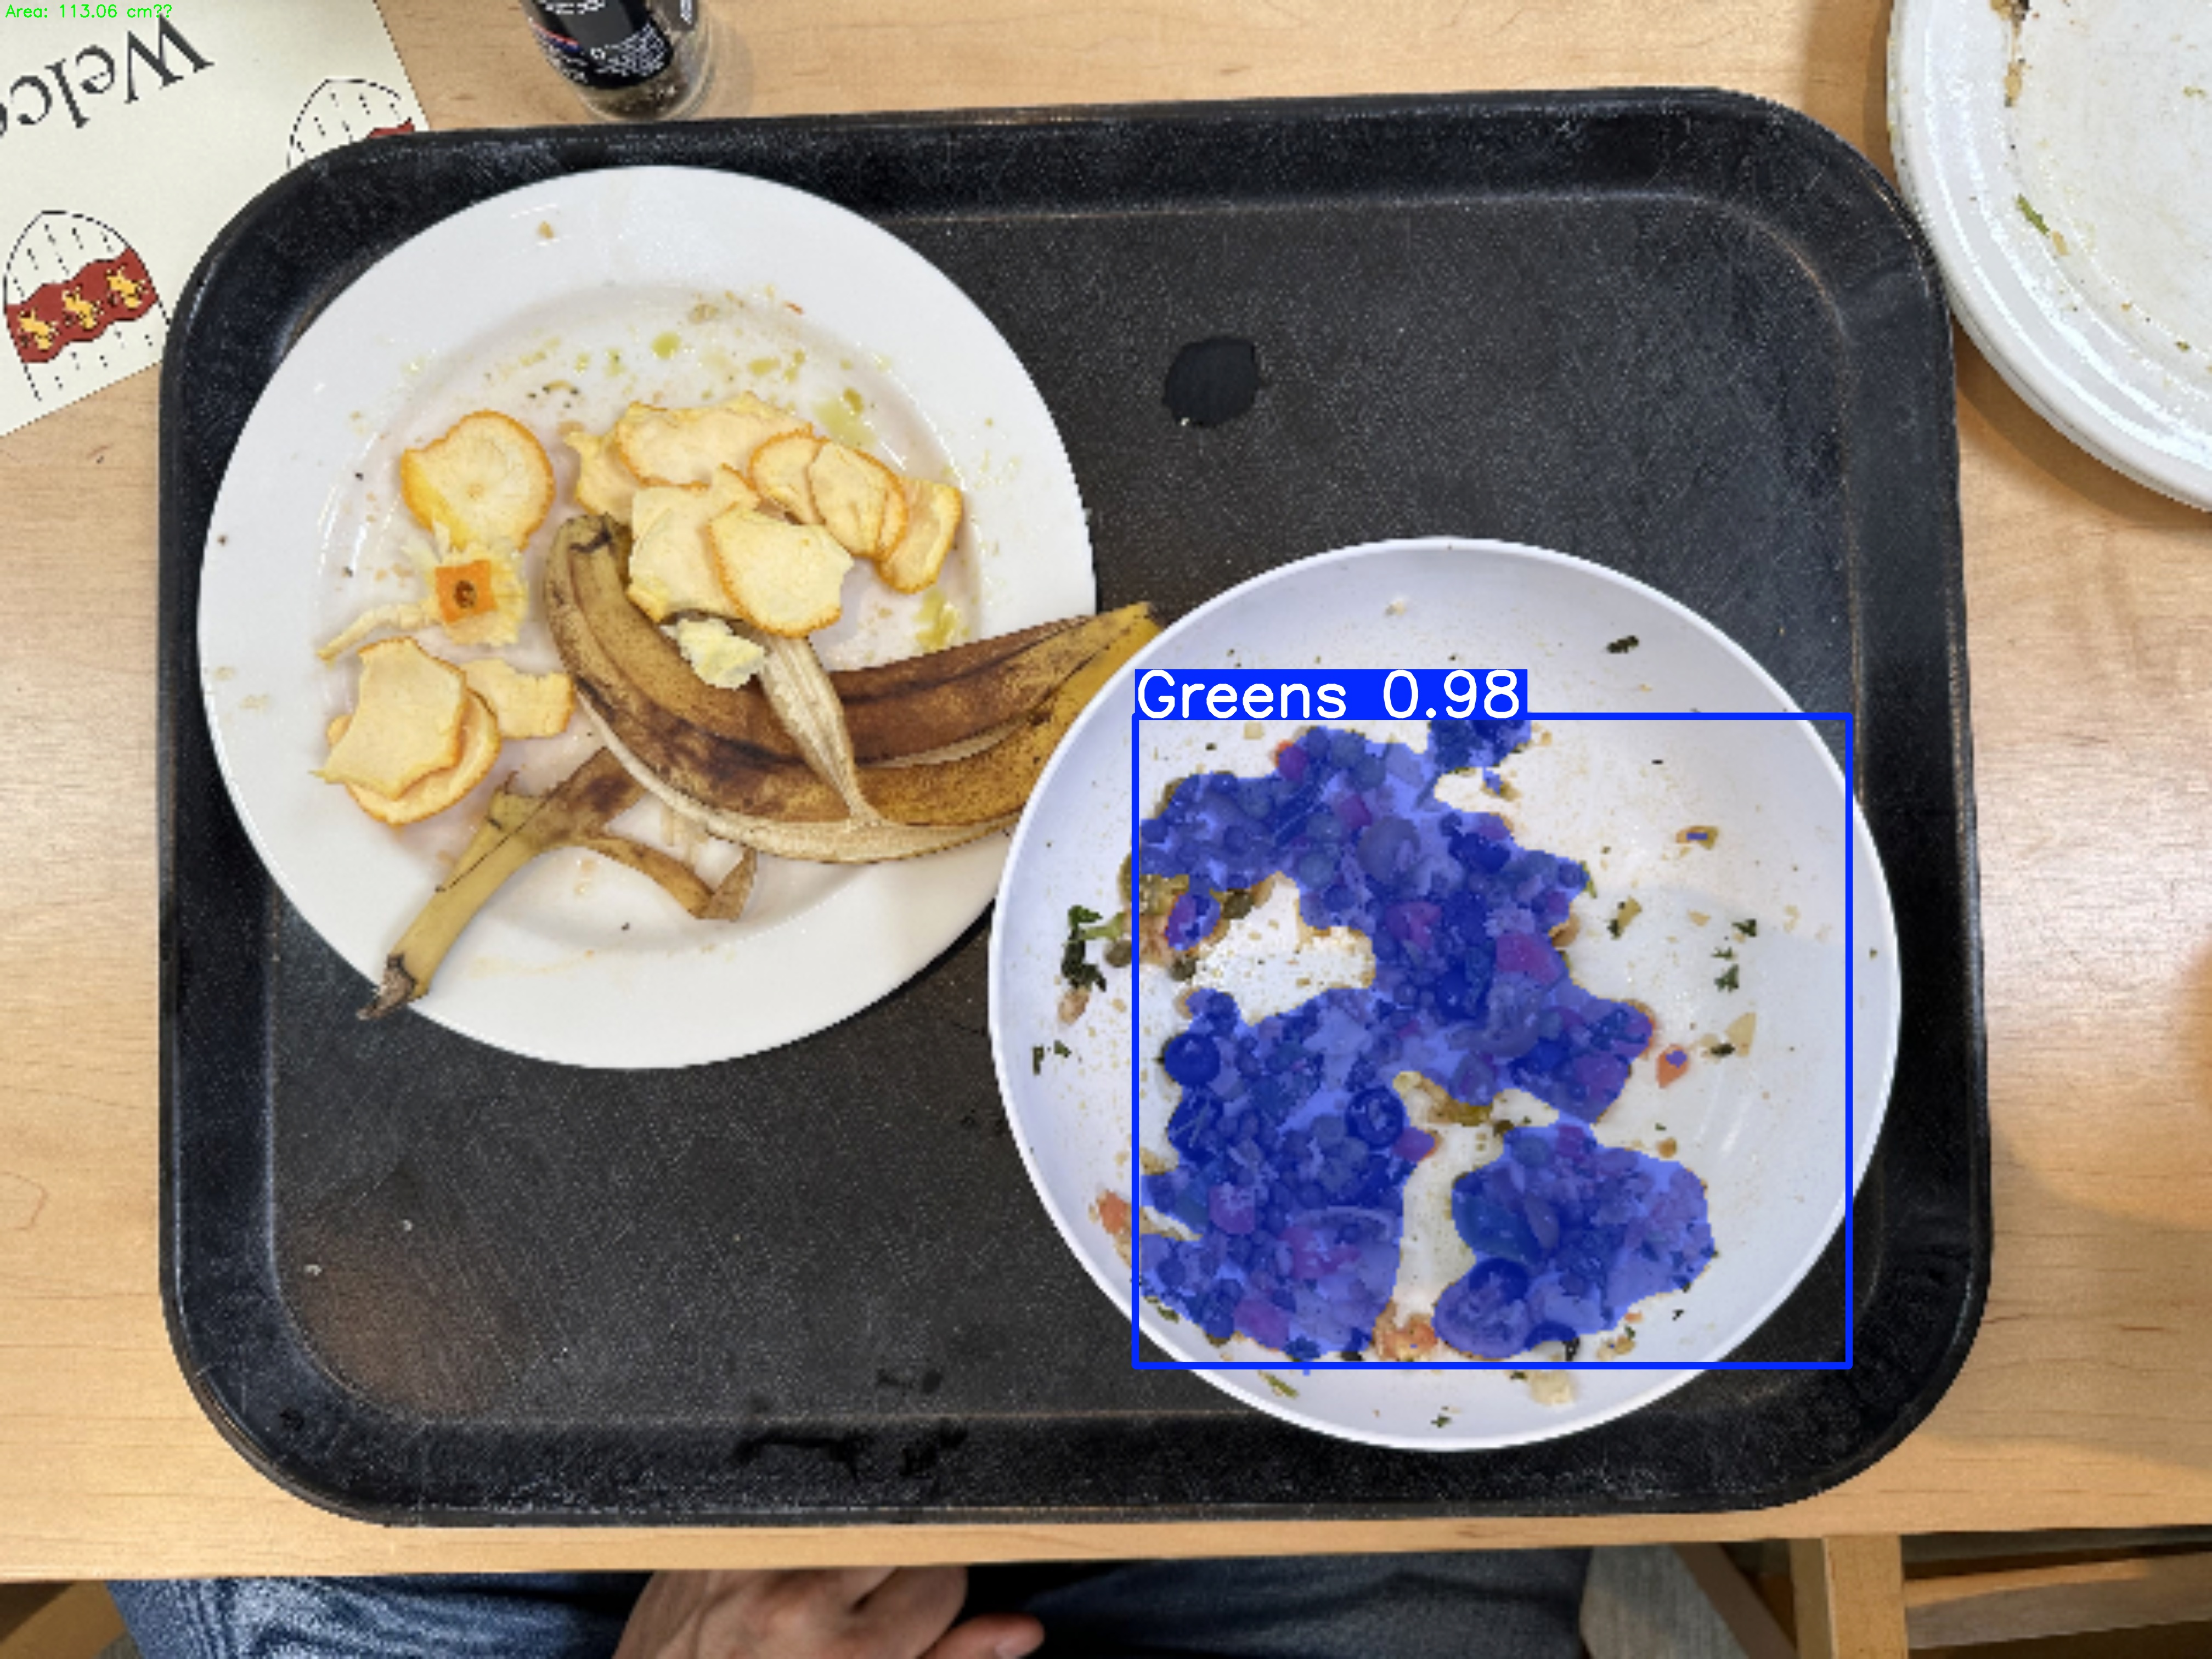

Detected area: 113.06 cm²


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import Image, display

# Configuration
model_path = 'runs/segment/train/weights/best.pt'
image_path = 'data/validation/images/13387b54-IMG_0396_2_1.jpg'
ratio = 0.005940  # cm² per pixel

# Load model and predict
model = YOLO(model_path)
results = model.predict(image_path)

# Process results
for result in results:
    if result.masks is not None:
        # Get first mask (assuming single object segmentation)
        mask = result.masks.data[0].cpu().numpy()

        # Calculate pixel area
        pixel_area = np.sum(mask > 0.5)  # Threshold at 50% confidence
        cm2_area = pixel_area * ratio

        # Visualization
        overlay = result.plot()  # Get annotated image
        text = f"Area: {cm2_area:.2f} cm²"
        cv2.putText(overlay, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        # Save and display
        output_path = 'result_with_area.jpg'
        cv2.imwrite(output_path, overlay)
        display(Image(filename=output_path, height=400))

        print(f"Detected area: {cm2_area:.2f} cm²")
    else:
        print("No segmentation mask found in results")


In [ ]:
def calculate_greens_metrics(detected_area_cm2, height_cm=1):
    """
    Calculate nutritional and environmental metrics for greens.
    Uses research-based averages from search results.
    """
    # Volume calculation
    volume_cm3 = detected_area_cm2 * height_cm

    # Mass calculation (assuming density ~1 g/cm3 like water)
    mass_g = volume_cm3 * 1  # 1 g/cm3 density
    mass_kg = mass_g / 1000

    # Calorie calculation (22 kcal/100g average from [1][6])
    calories_per_100g = 22
    calories = (mass_g / 100) * calories_per_100g

    # Carbon footprint (0.04 kg CO2eq/kg average from [1][3][5])
    carbon_per_kg = 0.04
    carbon_footprint = mass_kg * carbon_per_kg

    return {
        'volume_cm3': volume_cm3,
        'mass_g': mass_g,
        'calories_kcal': calories,
        'carbon_footprint_kgCO2eq': carbon_footprint
    }

# Example usage with your detected area
detected_area = 113.06  # From your prediction results
results = calculate_greens_metrics(detected_area)

print(f"""Nutritional & Environmental Impact:
- Volume: {results['volume_cm3']:.1f} cm³
- Mass: {results['mass_g']:.1f} g
- Calories: {results['calories_kcal']:.1f} kcal
- Carbon Footprint: {results['carbon_footprint_kgCO2eq']:.4f} kg CO₂eq""")


Nutritional & Environmental Impact:
- Volume: 113.1 cm³
- Mass: 113.1 g
- Calories: 24.9 kcal
- Carbon Footprint: 0.0045 kg CO₂eq


In [ ]:
# Create "my_seg_model" folder to store segmentation model weights and results
!mkdir /content/my_green_seg_model

# Copy segmentation model files (adjust paths if needed)
!cp /content/runs/segment/train/weights/best.pt /content/my_seg_model/my_green_seg_model.pt
!cp -r /content/runs/segment/train /content/my_green_seg_model

# Zip into "my_seg_model.zip"
%cd my_green_seg_model
!zip /content/my_green_seg_model.zip my_seg_model.pt
!zip -r /content/my_green_seg_model.zip train
%cd /content

cp: cannot create regular file '/content/my_seg_model/my_green_seg_model.pt': No such file or directory
/content/my_green_seg_model
	zip warning: name not matched: my_seg_model.pt

zip error: Nothing to do! (/content/my_green_seg_model.zip)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix_normalized.png (deflated 39%)
  adding: train/labels.jpg (deflated 52%)
  adding: train/confusion_matrix.png (deflated 39%)
  adding: train/args.yaml (deflated 53%)
  adding: train/results.png (deflated 5%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/results.csv (deflated 69%)
  adding: train/MaskR_curve.png (deflated 19%)
  adding: train/BoxR_curve.png (deflated 19%)
  adding: train/labels_correlogram.jpg (deflated 59%)
  adding: train/MaskP_curve.png (deflated 17%)
  adding: train/train_batch52.jpg (deflated 8%)
  adding: train/train_batch1.jpg (deflated 3%)
  adding: train/MaskPR_curve.

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_green_seg_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>